# Part II - Prosper Loan Explanatory Analysis
## by Adeyinka Abiola


## Investigation Overview


> In this presentation i focused on determining the factors that have effect on the Borrowers annual perecentage rate.
    
> The Summary of findings obtained from the exploration are:
- Prosper started their business in 2005. They had only 22 loans in 2005. The number of loans increased until 2008 where it dropped drastically from 11552 loans to 2047 loans in 2009. Then the loan steadily increases from 2010 with a record high number 
- The Borrowers annual percentage rate distribution appears to be multimodal. The loan amounts are mostly right skewed with different several peaks. The most frequently loaned amount is 4,000. The loan terms are split into 3 loan terms of 12 months, 26 months and 60 months with 36 months being the most frequently used term. Most of the Loans have a current status with another substantial amount of loans have been completed. The past due loans are split into 6 groups in respect to the number of days they have exceeded.The most frequently loan category applied for is Debt Consolidation. The distribution of monthly income is right skewed. The most frequent monthly income by borrowers seems to be about 5000 with most stated montly income less than 30000.
- Borrower Rate is negatvely correlated with the loan original amount. The higher the loan amount obtained the lower the borrowers annual percentage rate. The higher the loan amount the higher the term status given for loan repayment. Borrowers with higher monthly income have higher loan amounts. Borrowers with higher monthly income are able to pay higher monthly loan repayments. The higher the loan amount the higher the monthly repayment amount. It is obvious that borrowers that own homes have more employment history than their counterparts and non-homeowners majorly loaned amounts between the ranges of 0 - 5000 with a max of 30000. While most home owners were spread across different amounts betwwen the range of 5000 and above.
- The 36 months term loans have borrowers annual percentage rate between 0 - 0.4 with a few outliers going to 0.5, Loans for 60 months term are concentrated more on the higher loan amounts and borrowers APR between 0.1 - 0.35, while the 12 months loan term are majorly for lowe loan amounts with a borrowerAPR between 0 - 0.35. Although, the term didn't have a significant relationship to strentheng the effects on the Borrowers annual percentage rate.
- The effect of the loan terms on the Monthly loan payment to be paid back depending on loan amount was an interesting find. - For loans that cover only 12 months, the monthly fee tends to be more than the other terms since it is a shorter term. While the loans are more spread across for loan terms of 60 months.


## Dataset Overview

> This data set contains information on peer to peer loans facilitated by credit company Prosper. There are 113,937 loans with 81 variables. For the purpose of this investigation I've taken the following 13 variables: 'Term', 'LoanStatus', 'BorrowerAPR', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate', 'MonthlyLoanPayment'

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pywaffle import Waffle

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


In [2]:
#loading the dataset into a dataframe
df = pd.read_csv('prosperLoanData.csv')

target_variables = ['Term', 'LoanStatus', 'BorrowerAPR', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus',
                    'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount',
                    'LoanOriginationDate', 'MonthlyLoanPayment']

#extracting the variables we want to use and storing them in a seperate dataframe called 'sub_df'
sub_df = df[target_variables]

#rename column names to be easier to type
sub_df.rename(columns={'ListingCategory (numeric)' : 'ListingCategory'}, inplace = True)

#Change the datatype of variables that are incorrectly assigned

#LoanOriginationDate should be datetime datatype
sub_df['LoanOriginationDate'] = pd.to_datetime(sub_df['LoanOriginationDate'])

#replace the missing values in ProsperScore with 0 to indicate 'Not available'
sub_df['ProsperScore'] = sub_df['ProsperScore'].fillna(0)

#dealing with the missing values in BorrowerAPR by replacing the missing values with the mean of BorrowerAPR
sub_df['BorrowerAPR'] = sub_df['BorrowerAPR'].fillna(sub_df['BorrowerAPR'].mean())
sub_df.info()

cat = (sub_df['LoanStatus'] == 'Completed') | (sub_df['LoanStatus'] == 'Chargedoff') | (sub_df['LoanStatus'] == 'Defaulted')
sub_df = sub_df[cat]

def change(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
sub_df['LoanStatus'] = sub_df.apply(change, axis=1)
sub_df['LoanStatus'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Term                      113937 non-null  int64         
 1   LoanStatus                113937 non-null  object        
 2   BorrowerAPR               113937 non-null  float64       
 3   ProsperScore              113937 non-null  float64       
 4   ListingCategory           113937 non-null  int64         
 5   EmploymentStatus          111682 non-null  object        
 6   EmploymentStatusDuration  106312 non-null  float64       
 7   IsBorrowerHomeowner       113937 non-null  bool          
 8   DebtToIncomeRatio         105383 non-null  float64       
 9   StatedMonthlyIncome       113937 non-null  float64       
 10  LoanOriginalAmount        113937 non-null  int64         
 11  LoanOriginationDate       113937 non-null  datetime64[ns]
 12  Mo

Completed    38074
Defaulted    17010
Name: LoanStatus, dtype: int64

## Exploration Analyis Question

> Factors that affect the borrowers annual percentage rate (BorrowerAPR)? 


## Borrower APR Distribution

> The distribution of the borrowers annual distribution rate is multimodal with several peaks. 


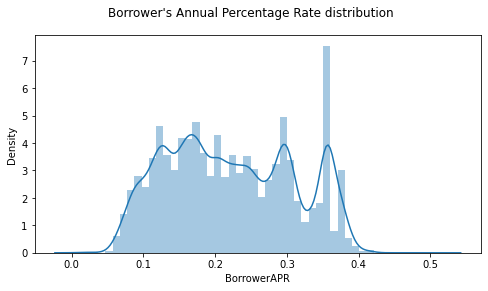

In [5]:
#Distribution of the BorrowerAPR feature
plt.figure(figsize=(8,4))
plt.suptitle("Borrower's Annual Percentage Rate distribution")
sb.distplot(sub_df['BorrowerAPR']);

## Correlation Analysis Between all variables

> Relationships to be explored are **"Term vs LoanOriginalAmount", "BorrowerAPR vs LoanOriginalAmount" and "LoanOriginalAmount vs MonthlyLoanPayment"**

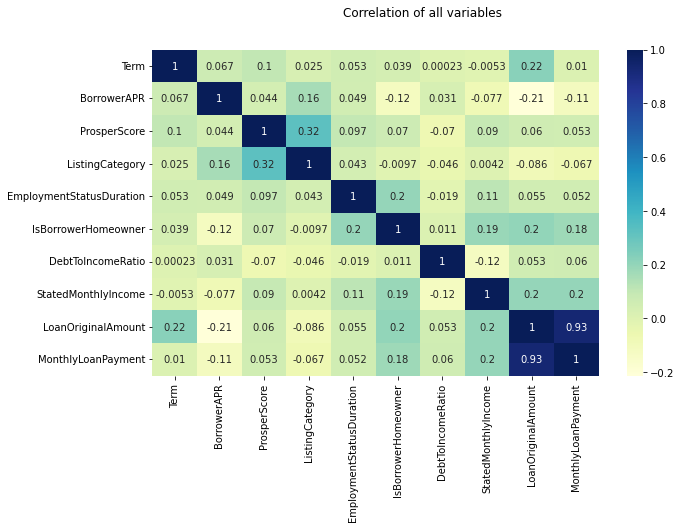

In [7]:
#Firstly Correlation plot between the all variables
plt.figure(figsize = [10, 6])
sb.heatmap(sub_df.corr(), cmap="YlGnBu", annot=True)
plt.suptitle("Correlation of all variables");

## Term vs Loan Original Amount

> The higher the loan amount the higher the term status given for loan repayment.

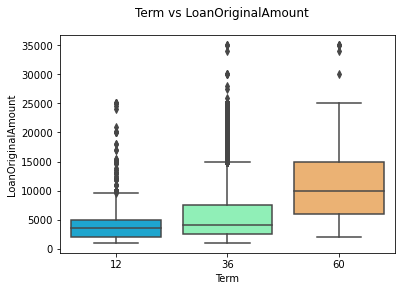

In [8]:
sb.boxplot(x='Term',y='LoanOriginalAmount',data=sub_df,palette='rainbow')
plt.suptitle("Term vs LoanOriginalAmount");

## BorrowerAPR vs LoanOriginalAmount

> - The higher the loan amount obtained the lower the borrowers annual percentage rate

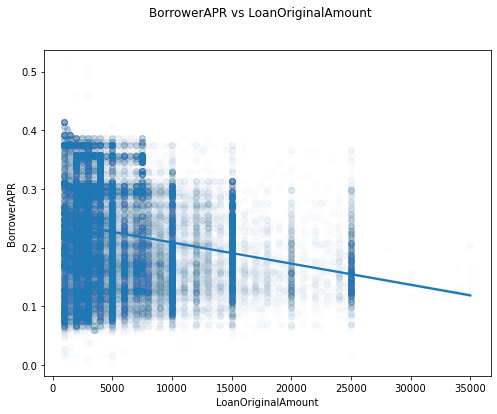

In [9]:
plt.figure(figsize = [8, 6])
sb.regplot(x = 'LoanOriginalAmount' , y = 'BorrowerAPR', data = sub_df, scatter_kws={'alpha':0.01})
plt.suptitle("BorrowerAPR vs LoanOriginalAmount");

## LoanOriginalAmount vs MonthlyLoanPayment

>  The higher the loan amount the higher the monthly repayment amount

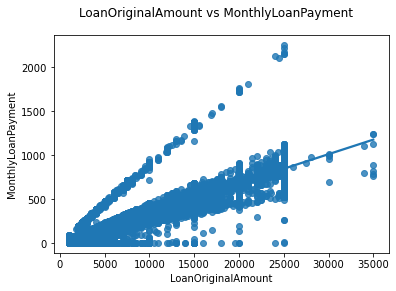

In [10]:
sb.regplot(x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', data = sub_df)
plt.suptitle("LoanOriginalAmount vs MonthlyLoanPayment");

## LoanOriginalAmount vs BorrowerAPR vs Term

> The 36 months term loans have borrowers annual rate percentage between 0 - 0.4 with a few outliers going to 0.5, Loans for 60 months term are concentrated more on the higher loan amounts and borrowers APR between 0.1 - 0.35, while the 12 months loan term are majorly for lowe loan amounts with a borrowerAPR between 0 - 0.35.

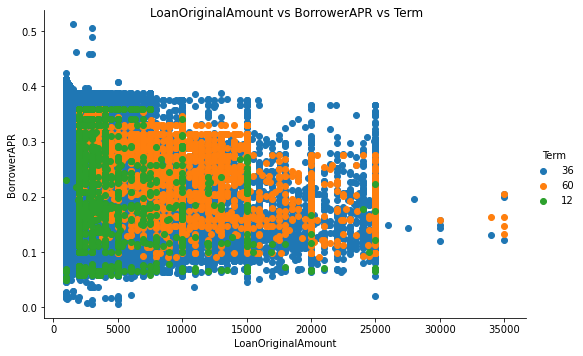

In [11]:
g = sb.FacetGrid(data = sub_df, hue = 'Term',hue_order = [36, 60, 12], size = 5, aspect = 1.5)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR')
g.add_legend()
plt.suptitle("LoanOriginalAmount vs BorrowerAPR vs Term");

## LoanOriginalAmount vs MonthlyLoanPayment vs Term

> The effect of the loan terms on the Monthly loan payment to be paid back depending on loan amount. - For loans that cover only 12 months, the monthly fee tends to be more than the other terms since it is a shorter term. While the loans are more spread across for loan terms of 60 months.

<Figure size 864x576 with 0 Axes>

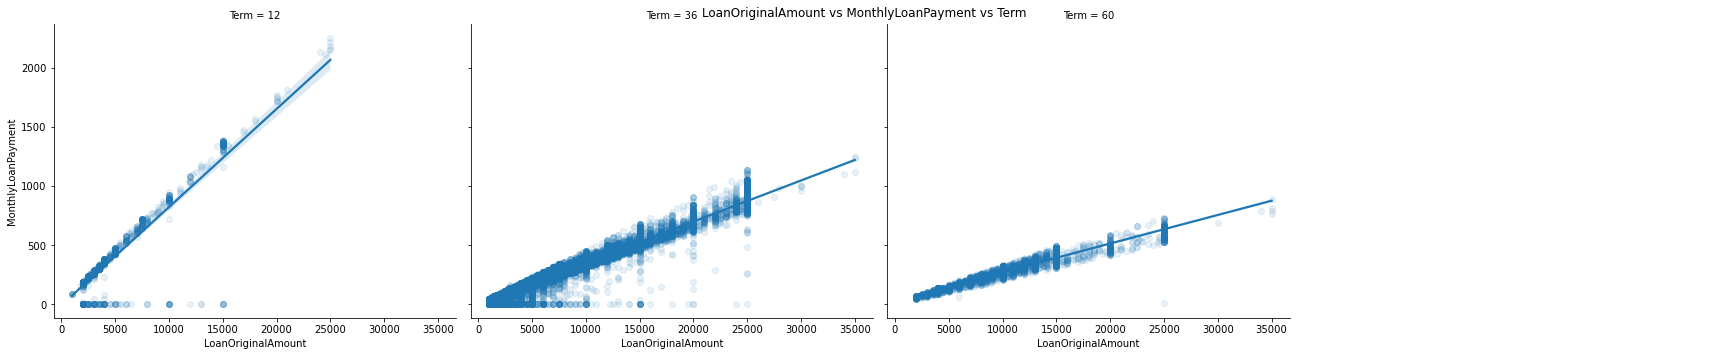

In [15]:
plt.figure(figsize = [12, 8]);
g=sb.FacetGrid(data=sub_df, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'MonthlyLoanPayment', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend()
plt.suptitle("LoanOriginalAmount vs MonthlyLoanPayment vs Term");

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_Prosper_Loan_SlideDeck.ipynb --to slides --post serve --no-input --no-prompt